<a href="https://colab.research.google.com/github/ngminhqui/shiny-examples/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và tên: Vũ Lê Minh

Xây dựng mô hình hồi quy bội để phân tích tác động của các hình thức quảng cáo lên doanh thu.

1. Mô tả dữ liệu

In [ ]:
# Cài đặt các gói
install.packages(c("pacman", "rio", "tidyverse", "skimr", "ggthemes", "ggfortify", "reshape", "corrplot", "car"))
pacman::p_load(rio, tidyverse, skimr, ggthemes, ggfortify, reshape, , corrplot, car)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Your package installed

Warning message in pacman::p_load(rio, tidyverse, skimr, ggthemes, ggfortify, reshape, :
“Failed to install/load:
”


In [ ]:
# Nhập dữ liệu
ms <- import("marketing_sales.csv") 
head(ms, n = 5) 

,V1,social,tele,newspaper,turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419
2,2,156.26,129.85,62.70,856.2597
3,3,124.38,187.57,140.04,964.9689
4,4,157.69,187.48,143.94,1017.4412
5,5,158.23,222.41,116.04,1115.2990


In [ ]:
# Mô tả thống kê dữ liệu
skim(ms)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── Data Summary ────────────────────────
                           Values
Name                       ms    
Number of rows             200   
Number of columns          5     
_______________________          
Column type frequency:           
  numeric                  5     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd    p0   p25  p50   p75  p100
1 X                     0             1 100.  57.9   1    50.8 100.  150.  200 
2 social                0             1 149.  27.2  59.6 132.  151.  168.  217.
3 tele                  0             1 173.  39.0  82.6 144.  175.  198.  287.
4 newspaper             0             1 101.  28.9  51.7  76.8 100.  126.  149.
5 turnover              0             1 959. 123.  619.  874.  953. 1052. 1345.
  hist 
1 ▇▇▇▇▇
2 ▁▂▇▇▂
3 ▂▇▇▅▁
4 ▇▇▇▆▇
5 ▁▇▇▅▁


In [ ]:
# Qua bảng thống kê mô tả, ta có thể thấy file không có dữ liệu trống, một số giá trị của các biến như giá trị trung bình (mean), 
#độ lệch chuẩn (sd), các giá trị bách phân vị... 

In [ ]:
# Lựa chọn các biến chính trong file dữ liệu để phân tích
ms %>% select(social, tele, newspaper, turnover) -> df
df %>% head(n= 5)

,social,tele,newspaper,turnover
,<dbl>,<dbl>,<dbl>,<dbl>
1,200.92,142.17,145.41,943.0419
2,156.26,129.85,62.70,856.2597
3,124.38,187.57,140.04,964.9689
4,157.69,187.48,143.94,1017.4412
5,158.23,222.41,116.04,1115.2990


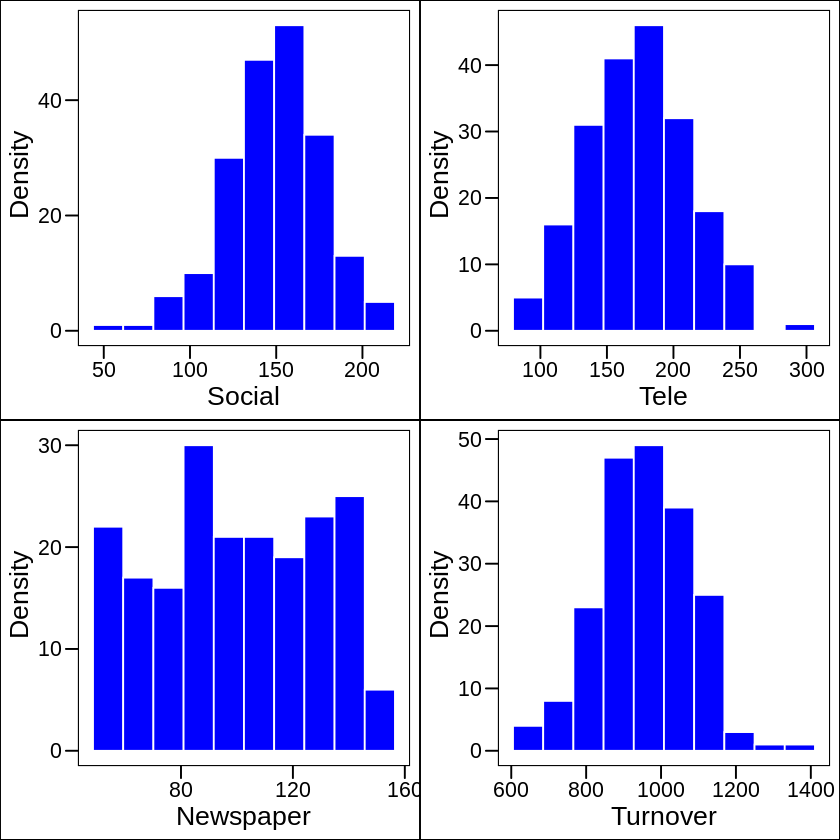

In [ ]:
# Mô tả dữ liệu qua biểu đồ histogram

df %>% ggplot(aes(social)) +
         geom_histogram(fill = "blue",
                        col = "white",
                        bins = 10) +
         labs(x = "Social",
              y = " Density") +
         theme_base() -> g1

df %>% ggplot(aes(tele)) +
         geom_histogram(fill = "blue",
                        col = "white",
                        bins = 10) +
         labs(x = "Tele",
              y = " Density") +
         theme_base() -> g2

df %>% ggplot(aes(newspaper)) +
         geom_histogram(fill = "blue",
                        col = "white",
                        bins = 10) +
         labs(x = "Newspaper",
              y = " Density") +
         theme_base() -> g3

df %>% ggplot(aes(turnover)) +
         geom_histogram(fill = "blue",
                        col = "white",
                        bins = 10) +
         labs(x = "Turnover",
              y = " Density") +
         theme_base() -> g4

gridExtra::grid.arrange(g1, g2, g3, g4, ncol = 2)                    

In [ ]:
# Mô tả dữ liệu qua biểu đồ boxplot
df %>% melt() -> df1 
df1 %>% head(n = 5)

Using  as id variables



,variable,value
,<fct>,<dbl>
1,social,200.92
2,social,156.26
3,social,124.38
4,social,157.69
5,social,158.23


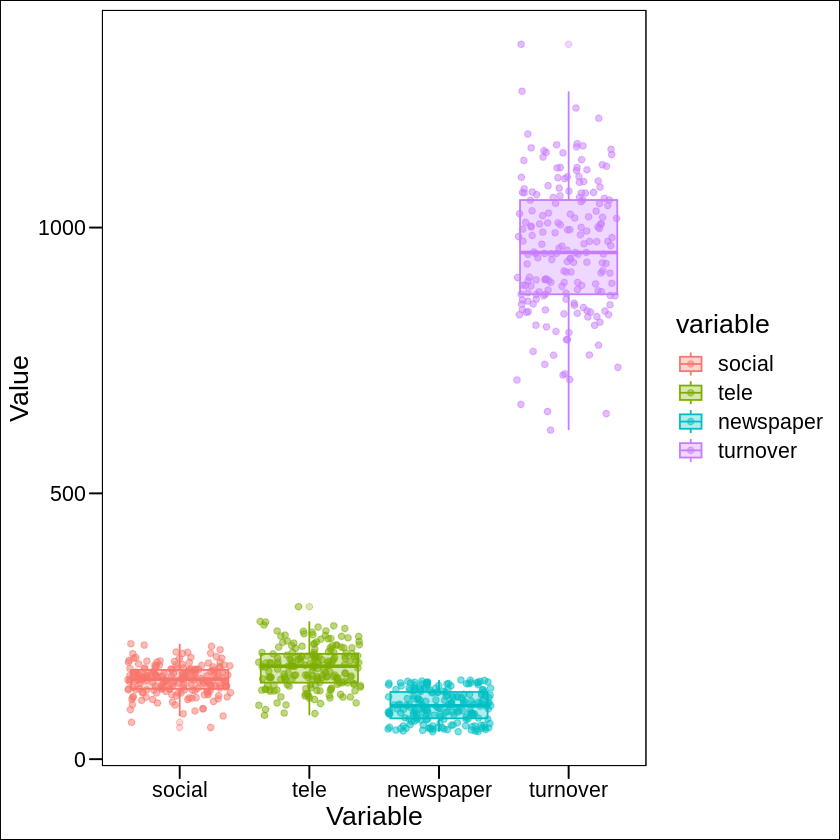

In [ ]:
df1 %>% ggplot(aes(x = variable,
                   y = value,
                   fill = variable,
                   col = variable)) +
          geom_boxplot(alpha = 0.3) +
          geom_jitter(alpha = 0.5) +
          labs(x = "Variable", y = "Value") +
          theme_base() -> g5
g5

2. Phân tích tương quan

In [ ]:
# Ước tính hệ số tương quan giữa các biến 
df %>% cor(method = "pearson") -> cor_df
cor_df

,social,tele,newspaper,turnover
social,1.00000000,0.08401121,0.047806059,0.487083735
tele,0.08401121,1.00000000,-0.039579633,0.903092760
newspaper,0.04780606,-0.03957963,1.000000000,-0.002900308
turnover,0.48708374,0.90309276,-0.002900308,1.000000000


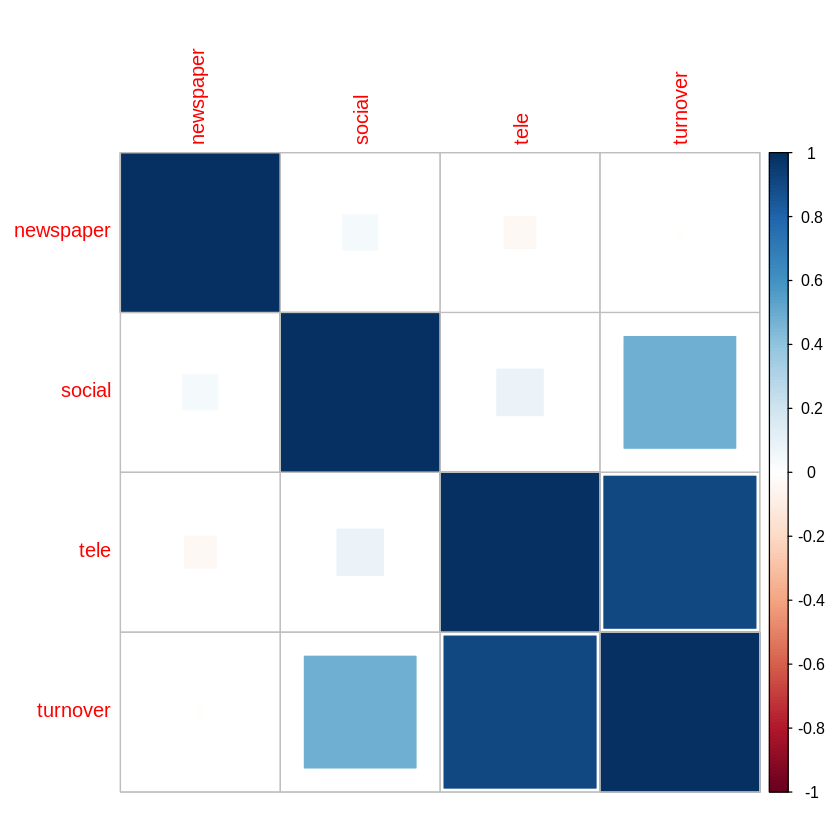

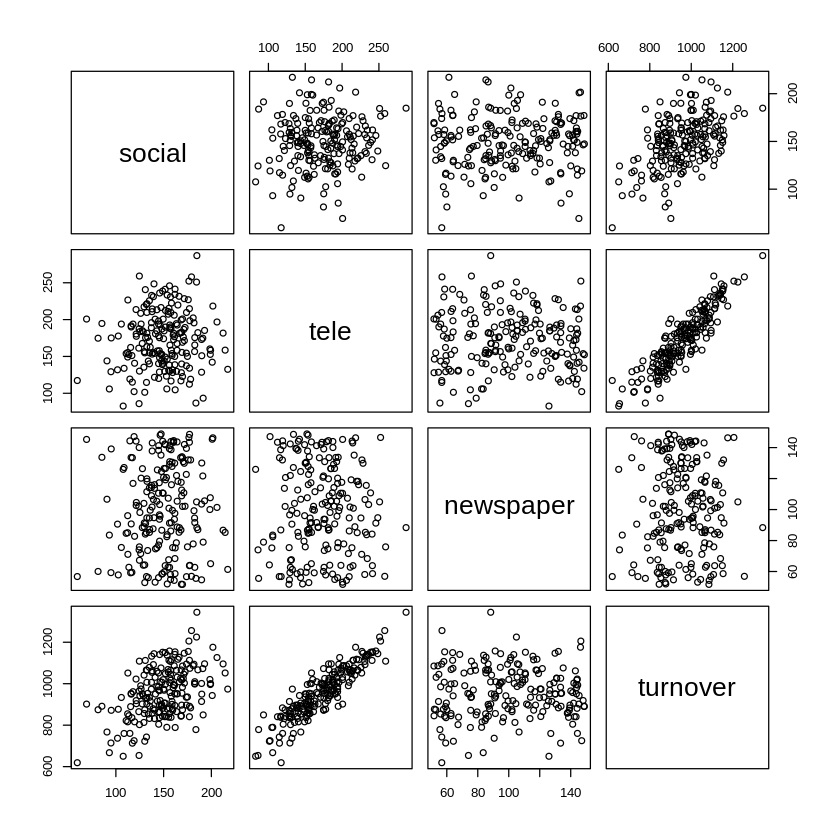

In [ ]:
# Mô tả mối tương quan giữa các biến qua biểu đồ
cor_df %>% corrplot(order = "hclust", method = "square")
pairs(df)

In [ ]:
# Qua đồ thị ta có thể thấy các biến "social" và "tele" dường như có mối quan hệ tuyến tính với biến "turnover".

In [ ]:
# Kiểm định mối tương quan giữa biến "turnover" và "social"
cor.test(df$turnover, df$social, method = "pearson")


	Pearson's product-moment correlation

data:  df$turnover and df$social
t = 7.8478, df = 198, p-value = 2.597e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3735893 0.5862096
sample estimates:
      cor 
0.4870837 


In [ ]:
# Hệ số tương quan giữa biến "social" và biến "turnover" là 0.487. Khoảng tin cậy dao động từ 0.374 đến 0.586 
#và trị số P = 2.597*10^-13 cho thấy mối tương quan giữa "social" và "turnover" có ý nghĩa thống kê.

In [ ]:
# Vẽ biểu đồ tương quan giữa "social" và "turnover"

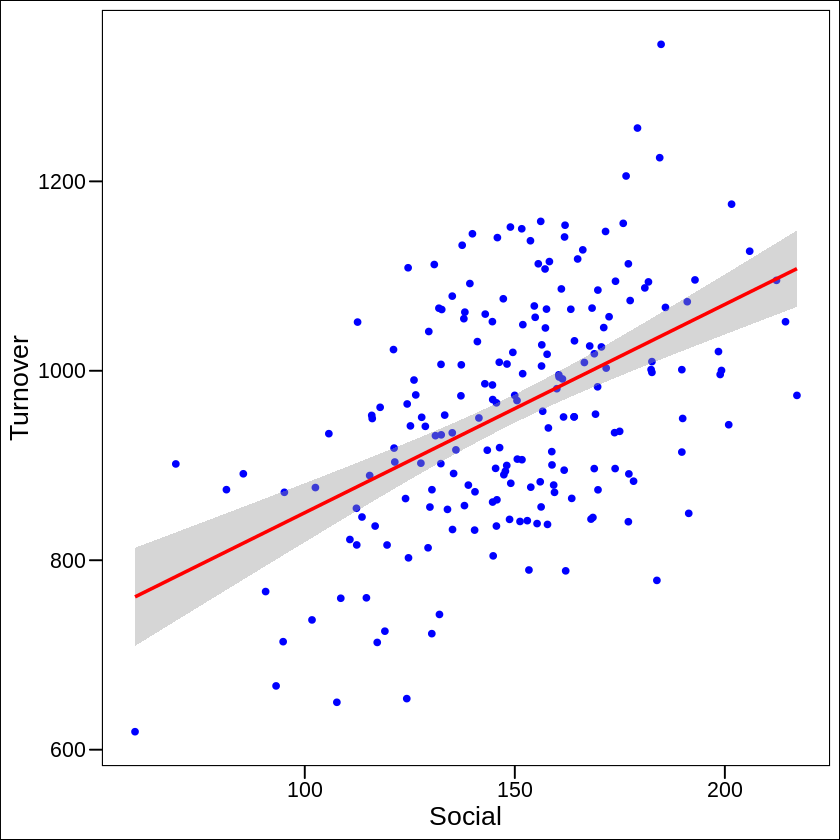

In [ ]:
df %>% ggplot(aes(social, 
                  turnover)) + 
        geom_point(col = "blue") + 
        labs(x = "Social",
             y = "Turnover") +
        geom_smooth(method = lm,
                    formula = y ~ x,
                    col = "red") +
        theme_base() -> p1 
p1

In [ ]:
# Kiểm định mối tương quan giữa biến "turnover" và "tele"
cor.test(df$turnover, df$tele, method = "pearson")


	Pearson's product-moment correlation

data:  df$turnover and df$tele
t = 29.591, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8738405 0.9258309
sample estimates:
      cor 
0.9030928 


In [ ]:
# Hệ số tương quan giữa biến "tele" và biến "turnover" là 0.903. Khoảng tin cậy dao động từ 0.874 đến 0.926 
#và trị số P = 2.2*10^-16 cho thấy mối tương quan giữa "social" và "turnover" có ý nghĩa thống kê.

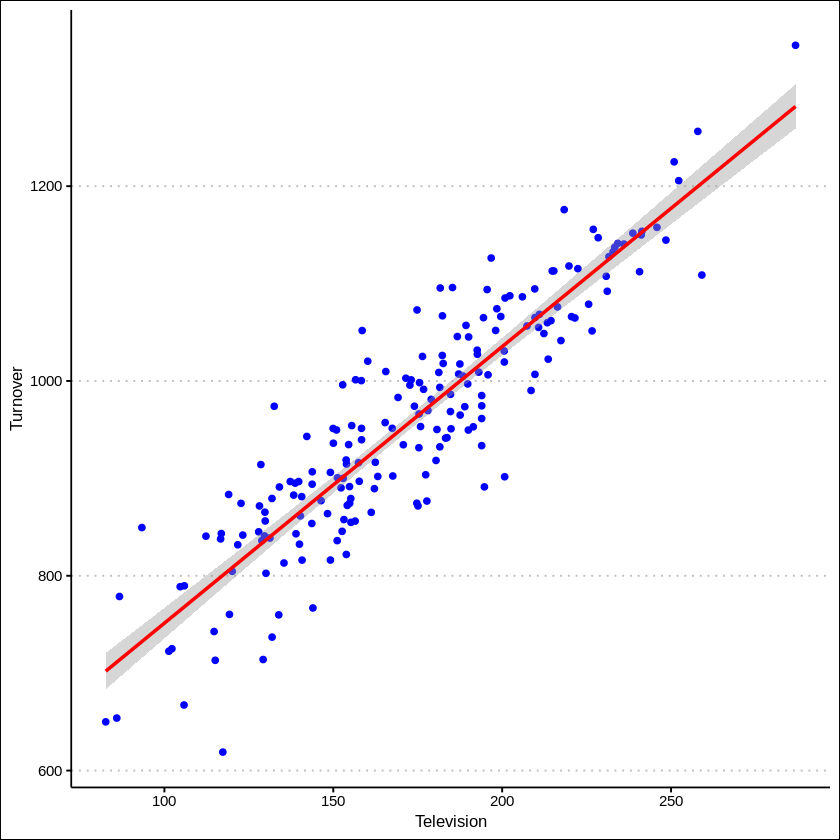

In [ ]:
# Vẽ biểu đồ tương quan giữa "tele" và "turnover"
df %>% ggplot(aes(tele,
                  turnover)) +
        geom_point(col = "blue") +
        labs(x = "Television",
             y = "Turnover") + 
        geom_smooth(method = lm,
                    formula = y ~ x,
                    col = "red") +
        theme_clean() -> p2
p2

3. Xây dựng mô hình

3.1. Ước lượng mô hình

In [ ]:
# Ước lượng mô hình hồi quy đa biến:
model1 <- lm(turnover ~ social + tele + newspaper,
             df)
summary(model1)


Call:
lm(formula = turnover ~ social + tele + newspaper, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.571  -9.826   0.581   9.575  40.175 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 202.19448    7.93632  25.477   <2e-16 ***
social        1.86693    0.03832  48.714   <2e-16 ***
tele          2.73133    0.02668 102.382   <2e-16 ***
newspaper     0.04969    0.03590   1.384    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.62 on 196 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9858 
F-statistic:  4605 on 3 and 196 DF,  p-value: < 2.2e-16


In [ ]:
# Kết quả phân tích cho ra mô hình: turnover = 202,194 + 1,867*social + 2,731*tele + 0,05*newspaper + e
# Diễn giải mô hình: Dựa vào tham số của mô hình, ta thấy hình thức quảng cáo từ truyền hình từ trang mạng xã hội 
#có ảnh hưởng rất lớn đến doanh thu sản phẩm và các mối liên quan này có ý nghĩa thống kê (P < 0,001). Tác động của 
#hình thức quảng cáo qua báo giấy đến doanh thu sản phẩm rất thấp và không có ý nghĩa thống kê (P = 0,168), do đó
#ta có thể loại bỏ khỏi mô hình. Điều này dễ hiểu trong thời điểm hiện tại báo giấy đã không còn chỗ đứng so với các 
#loại hình khác như truyền hình và các trang web mạng xã hội... Mô hình 1 giải thích khoảng 98,58% các khác biệt về 
#tác động giữa các loại hình quảng cáo lên doanh thu sản phẩm.

In [ ]:
# Ước lượng mô hình hồi quy đa biến sau khi loại bỏ biến "newspaper"
model2 <- lm(turnover ~ social + tele,
             df)
summary(model2)


Call:
lm(formula = turnover ~ social + tele, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.589  -9.631   0.468   9.658  38.351 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.06397    7.13046   29.04   <2e-16 ***
social        1.86966    0.03836   48.74   <2e-16 ***
tele          2.72971    0.02671  102.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.65 on 197 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9857 
F-statistic:  6875 on 2 and 197 DF,  p-value: < 2.2e-16


In [ ]:
# Kết quả phân tích cho ra mô hình: turnover = 207,064 + 1,87*social + 2,73*tele + e
# Diễn giải mô hình: Mô hình 2 giải thích khoảng 98,57% các khác biệt về ảnh hưởng giữa các loại hình quảng cáo 
#không khác nhau nhiều so với mô hình 1. Điều này chứng tỏ việc bỏ quảng cáo qua báo giấy không làm ảnh hưởng đến
#doanh thu chung và công ty có thể tiết kiệm được khoản chi phí này.

3.2. Kiểm định mô hình

In [ ]:
# Kiểm định và lựa chọn mô hình

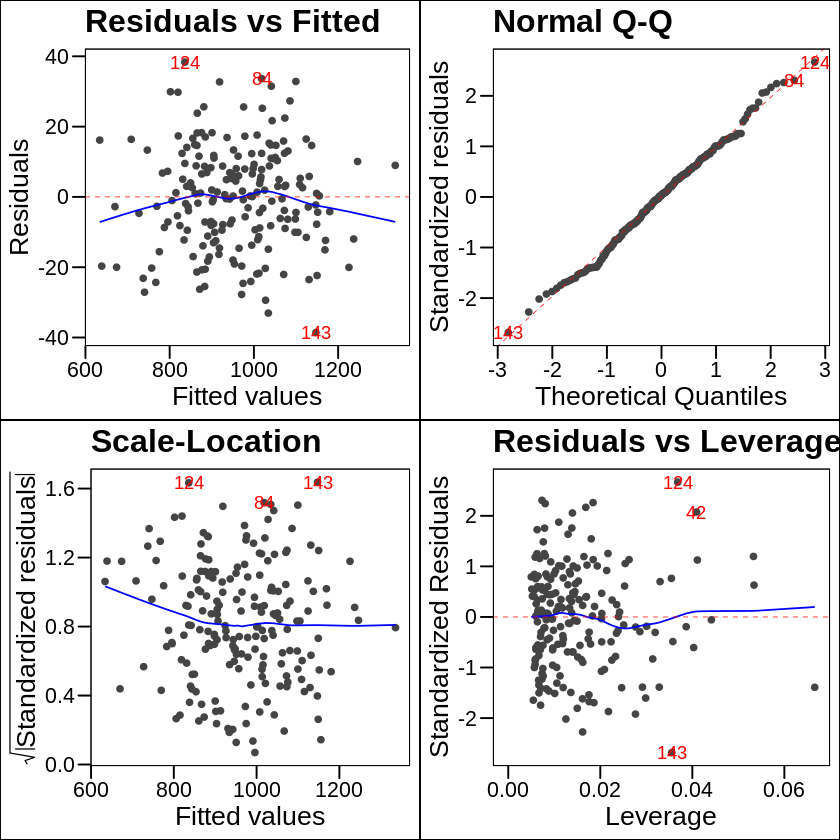

In [ ]:
model2 %>% autoplot(which = c(1:3,
                              5),
                    ncol = 2,
                    label.col = "red",
                    ad.col = "red") + 
              theme_base()

In [ ]:
# Nhận xét: 
# Đồ thị Residuals vs Fitted cho thấy giả thiết về tính tuyến tính của dữ liệu dường như bị vi phạm. Tuy nhiên 
#giả thiết trung bình của phần dư có thể coi là thỏa mãn.
# Đồ thị Normal Q-Q cho thấy giả thiết phần dư có phân phối chuẩn được thỏa mãn.
# Đồ thị Scale - Location cho ta thấy rằng giả thiết về tính đồng nhất của phương sai cũng thỏa mãn.
# Đồ thị Residuals vs Leverage chỉ ra có các quan sát thứ 42, 124 và 143 có thể là các quan sát ngoại lai có thể 
#ảnh hưởng đến bộ dữ liệu. Thông thường 01 quan sát được coi là ngoại lai nếu giá trị của nó nằm quá 3 lần giá trị
#độ lệch chuẩn so với trung vị của mẫu. Tuy nhiên các quan sát ngoại lại trên nằm trong khoảng cho phép nên mức độ
#ảnh hưởng là không quá nghiêm trọng. 

In [ ]:
#Kiểm tra sai số ngẫu nhiên có phân phối chuẩn
# H0: Dữ liệu có phân phối chuẩn
# H1: Dữ liệu không có phân phối chuẩn
re <- residuals(model2)
shapiro.test(re)


	Shapiro-Wilk normality test

data:  re
W = 0.9945, p-value = 0.676


In [ ]:
# Ta thấy giá trị P = 0.676 không có ý nghĩa thống kê nên không có cơ sở để loại bỏ giả thuyết H0. Do đó, phần dư có phân phối chuẩn.

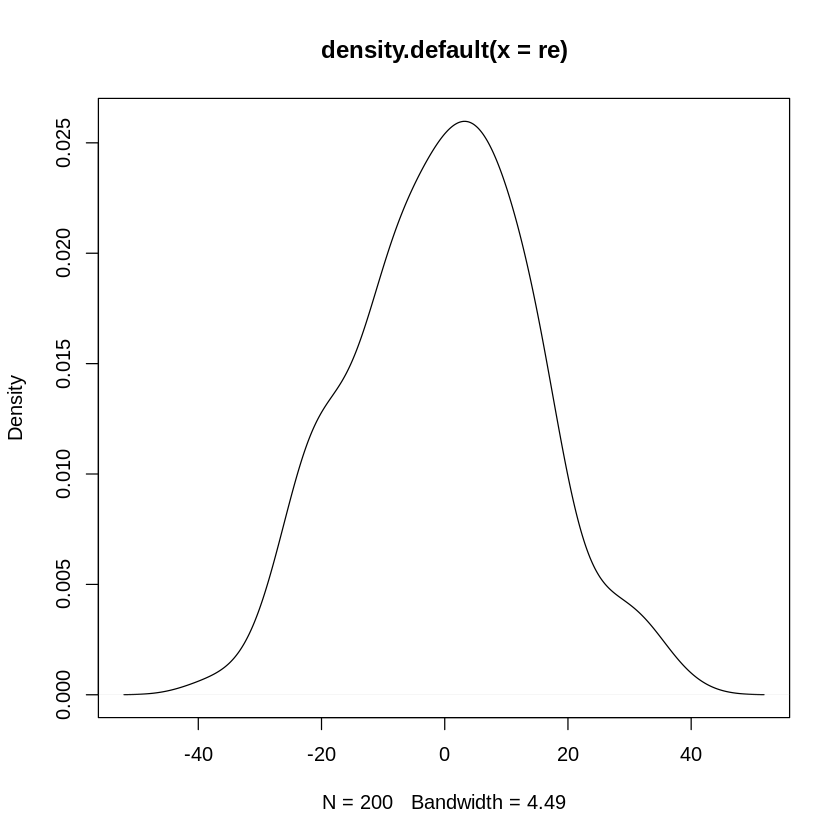

In [ ]:
# Vẽ đồ thị 
plot(density(re))

In [ ]:
# Đồ thị cũng có dạng hình chuông hơi lệch bên trái

In [ ]:
#Kiểm tra kỳ vọng của sai số ngẫu nhiên
t.test(re, mu = 0)


	One Sample t-test

data:  re
t = -1.73e-16, df = 199, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.032987  2.032987
sample estimates:
    mean of x 
-1.783556e-16 


In [ ]:
# Ta có giá trị P = 1 nên mô hình thỏa mãn giả thiết sai số ngẫu nhiên tại mỗi giá trị bằng 0.

In [ ]:
# Kiểm tra phương sai của sai số ngẫu nhiên không đổi

In [ ]:
# H0: phương sai sai số không đổi
# H1: phương sai sai số thay đổi
ncvTest(model2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2402166, Df = 1, p = 0.62405

In [ ]:
# Giá trị P = 0.624 không có ý nghĩa thống kê. Vì vậy, chúng ta không có cơ sở để loại bỏ giả thuyết Ho,
#kết luận phương sai của sai số ngẫu nhiên không đổi.

In [ ]:
# Kiểm tra mối quan hệ đa cộng tuyến của các biến
vif(model2)

social     tele 
1.007108 1.007108

In [ ]:
# Hệ số VIF của các biến độc lập đều nhỏ hơn 5, điều đó chứng tỏ rằng không có hiện tượng đa cộng tuyến.

3.3. Lựa chọn mô hình tối ưu
- Sử dụng phương pháp AIC

In [ ]:
# Cài đặt gói olsrr
install.packages("olsrr")
library(olsrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘goftest’, ‘nortest’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




In [ ]:
# Tìm mô hình tối ưu
ols_step_forward_aic(model1)
ols_step_backward_aic(model1)
ols_step_both_aic(model1)


                            Selection Summary                              
--------------------------------------------------------------------------
Variable       AIC         Sum Sq          RSS         R-Sq      Adj. R-Sq 
--------------------------------------------------------------------------
tele         2158.290    2442545.668    552324.300    0.81558      0.81465 
social       1646.428    2952568.285     42301.683    0.98588      0.98573 
--------------------------------------------------------------------------



                        Backward Elimination Summary                        
--------------------------------------------------------------------------
Variable        AIC          RSS         Sum Sq        R-Sq      Adj. R-Sq 
--------------------------------------------------------------------------
Full Model    1646.483    41892.203    2952977.765    0.98601      0.98580 
newspaper     1646.428    42301.683    2952568.285    0.98588      0.98573 
--------------------------------------------------------------------------




                                   Stepwise Summary                                    
-------------------------------------------------------------------------------------
Variable     Method       AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
-------------------------------------------------------------------------------------
tele        addition    2158.290    552324.300    2442545.668    0.81558      0.81465 
social      addition    1646.428     42301.683    2952568.285    0.98588      0.98573 
-------------------------------------------------------------------------------------


In [ ]:
# Diễn giải: 
# - Kết quả cho thấy mỗi phương pháp cho ra các biến khác nhau. 
# - Phương pháp forward và stepwise chọn mô hình với mỗi biến số tele và social vì mô hình với mỗi 
#biến này có hệ số AIC là thấp nhất. 
# - Với phương pháp backward chọn 02 mô hình: (1) mô hình với đầy đủ các biến và (2) mô hình với chỉ 
#biến newspaper. 
# - Các mô hình được giải thích khoảng 81,465% đến 98,58% sự khác biệt giữa các biến.


- Sử dụng phương pháp Bayes

In [ ]:
#Cài đặt gói BMA
install.packages("BMA")
library(BMA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’


Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.7-2)





Call:
bicreg(x = vars, y = y, strict = F, OR = 20)


  2  models were selected
 Best  2  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD       model 1     model 2   
Intercept  100.0  206.32708  7.46500   207.06397   202.19448
social     100.0    1.86924  0.03837     1.86966     1.86693
tele       100.0    2.72995  0.02671     2.72971     2.73133
newspaper   15.1    0.00752  0.02263       .         0.04969
                                                            
nVar                                       2           3    
r2                                       0.986       0.986  
BIC                                   -841.43597  -837.98755
post prob                                0.849       0.151  


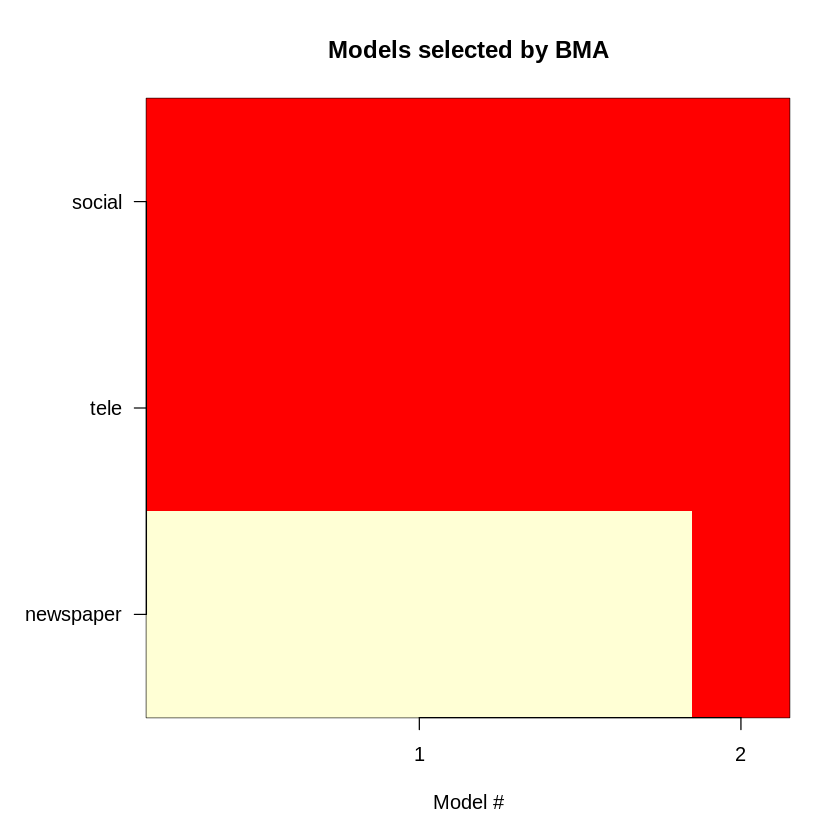

In [ ]:
# Tìm mô hình tối ưu
vars <- df[ , - 4]
y <- df[ , 4]
fit <- bicreg(x= vars,
              y = y, 
              strict = F,
              OR = 20)
summary(fit)
imageplot.bma(fit)

In [ ]:
# Diễn giải: Từ bảng kết quả và biểu đồ ta thấy
# - Phương pháp đã lựa chọn được 02 mô hình được chọn là "model 1" và "model 2";
# - Model 1 được coi là tốt nhất so với model 2, trong đó có 02 biến được chọn là "social" và "tele",
#hai biến này giải thích được khoảng 98.6% phương sai của y và xác suất model 1 xuất hiện trong nhiều 
#lần phân tích là 84,9%;
# - Model 2 có đầy đủ 03 biến là "social", "tele" và "newspaper", với hệ số R^2 = 98,6% như model 1. 
#Tuy nhiên model 2 có xác suất xuất hiện trong các lần phân tích thấp hơn chỉ có 15,1%.

4. Kết luận
- Ảnh hưởng của loại hình quảng cáo qua truyền hình và qua mạng xã hội có tác động lớn đến doanh thu sản phẩm thông qua phương trình hồi quy của mô hình được lựa chọn là: turnover = 207,064 + 1,87 x social + 2,73 x tele
- Ảnh hưởng của loại hình quảng cáo qua báo giấy đến doanh thu sản phẩm là khá thấp và công ty có thể bỏ qua để đỡ tốn chi phí quảng cáo.
- Mô hình đã giải thích được khoảng 98,6% các khác biệt về ảnh hưởng giữa các loại hình quảng cáo đến doanh thu sản phẩm.
- Các kiểm định đối với mô hình thỏa mãn các giả thiết của mô hình hồi quy.
- Qua các phương pháp lựa chọn mô hình tối ưu đã lựa chọn được mô hình tốt nhất như mô hình đã ước lượng ban đầu với hai biến là "social" và "tele". 